# General Preamble Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

# Additional Import Code for dataset W

In [2]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
# data (as pandas dataframes) 
x = wine_quality.data.features 
y = wine_quality.data.targets['quality']

# Question 1
## Run a linear regression on the entire wine dataset. Measure R-squared on both the training and test data sets. Also evaluate the resulting MSE and RMSE. 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("############ Assignment 2 Question 1 BEGIN ############")
# split data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, train_size=0.75, random_state=0)

# fit and predict
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"R^2 (train): {r2_train:.4f}")
print(f"R^2 (test): {r2_test:.4f}")
print(f"MSE (train): {mse_train:.4f}")
print(f"MSE (test): {mse_test:.4f}")
print(f"RMSE (train): {rmse_train:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")

print("\nEvaluating MSE and RMSE, a smaller number means the model is more accurate. MSE is the avg of squared residuals (how far we are from actual value) and then RMSE sqare roots it to bring the unit scale back.")
print("Looking at RMSE, we can see that our predicted wine quality score is about 0.73 off from the actual quality for training and 0.74 off from test.")
print("############# Assignment 2 Question 1 END #############")

############ Assignment 2 Question 1 BEGIN ############
R^2 (train): 0.2925
R^2 (test): 0.2900
MSE (train): 0.5338
MSE (test): 0.5582
RMSE (train): 0.7306
RMSE (test): 0.7471

Evaluating MSE and RMSE, a smaller number means the model is more accurate. MSE is the avg of squared residuals (how far we are from actual value) and then RMSE sqare roots it to bring the unit scale back.
Looking at RMSE, we can see that our predicted wine quality score is about 0.73 off from the actual quality for training and 0.74 off from test.
############# Assignment 2 Question 1 END #############


# Question 2
## Now categorize “good wines” as those securing a score of 7 or higher. All other wines are “bad wines”. Run a logistic regression to see whether you can predict good wines. Evaluate this model with a visualized confusion matrix, and an accuracy score.

############ Assignment 2 Question 2 BEGIN ############


C:\Users\trish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


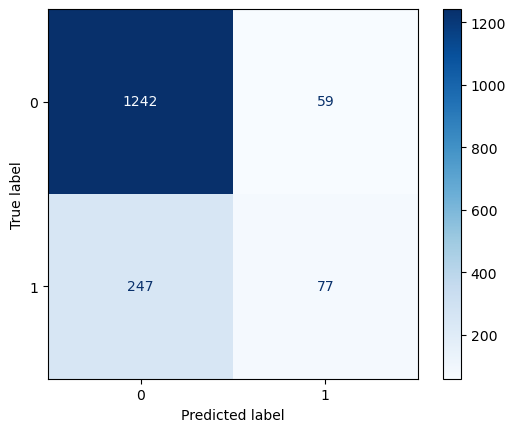

Accuracy: 0.8117
############# Assignment 2 Question 2 END #############


In [4]:
print("############ Assignment 2 Question 2 BEGIN ############")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# labeling 1 for good wine (quality >= 7) and 0 otherwise
y_bin = (y >= 7).astype(int)
y_train_bin = y_bin[y_train.index]
y_test_bin = y_bin[y_test.index]

# fit logistic regression
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train_bin)
y_pred = logreg.predict(x_test)

# confusion matrix and accuracy
cm = confusion_matrix(y_test_bin, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

print(f"Accuracy: {accuracy_score(y_test_bin, y_pred):.4f}")
print("############# Assignment 2 Question 2 END #############")

# Question 3
## Why doesn’t the number of wines in the confusion matrix add up to the total number of wines in the original dataset?

In [5]:
print("############ Assignment 2 Question 3 BEGIN ############")
print(f"Total wines in original dataset: {len(y)}")
print(f"Total wines in confusion matrix (test set): {cm.sum()}")

print("The confusion matrix evaluates our model's predictions which are only performed on the test data. Since we use a 75/25 split for train and test data, we only see approx. 25% of the wines in the matrix.")
print("############# Assignment 2 Question 3 END #############")

############ Assignment 2 Question 3 BEGIN ############
Total wines in original dataset: 6497
Total wines in confusion matrix (test set): 1625
The confusion matrix evaluates our model's predictions which are only performed on the test data. Since we use a 75/25 split for train and test data, we only see approx. 25% of the wines in the matrix.
############# Assignment 2 Question 3 END #############


# Question 4
## Repeat 1 and 2 for just the red wine and white wine datasets. Report your findings and remark on why this did or didn’t improve the evaluation results.

############ Assignment 2 Question 4 BEGIN ############

Linear Regression w/ Red Wines
R^2 (train): 0.3433
R^2 (test): 0.3331
MSE (train): 0.4368
MSE (test): 0.4076
RMSE (train): 0.6609
RMSE (test): 0.6384

Linear Regression w/ White Wines
R^2 (train): 0.2741
R^2 (test): 0.2388
MSE (train): 0.5556
MSE (test): 0.6371
RMSE (train): 0.7454
RMSE (test): 0.7982

Logistic Regression w/ Red Wines


C:\Users\trish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


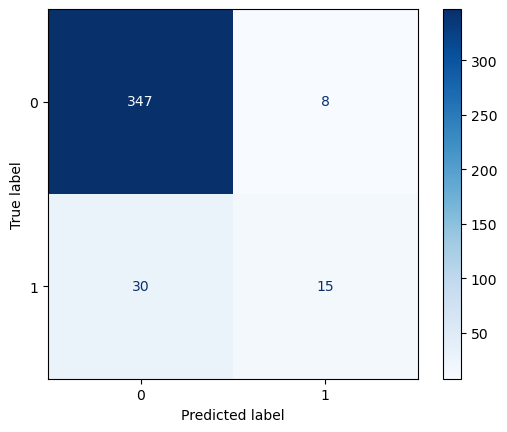

Accuracy: 0.9050

Logistic Regression w/ White Wines


C:\Users\trish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


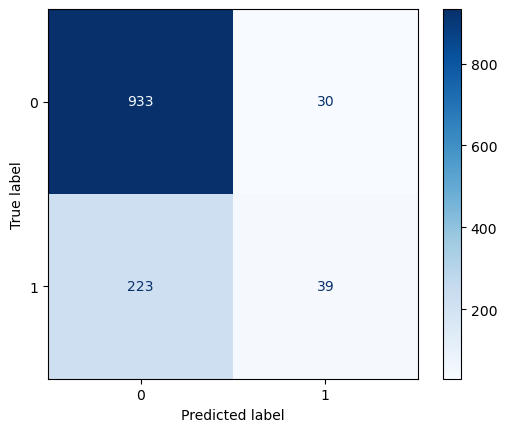

Accuracy: 0.7935

It can be observed that splitting the data between red and white wine leads to different results for both questions one and two.
This improves evaluation results because there may be different patterns in the data for red and white wine. Splitting the data better allows the model to capture the underlying trends.
The evaluation results improved for red wines but not for white wines because the linear regression was better fitted for the red wines compared to the white wines. 

############# Assignment 2 Question 4 END #############


In [6]:
print("############ Assignment 2 Question 4 BEGIN ############")
# split dataset by color
red_data = wine_quality.data.original['color'] == 'red'
white_data = wine_quality.data.original['color'] == 'white'

x_red = x[red_data]
y_red = y[red_data]
x_white = x[white_data]
y_white = y[white_data]

print("\nLinear Regression w/ Red Wines")
xr_tr, xr_te, yr_tr, yr_te = train_test_split(x_red, y_red, test_size=0.25, train_size=0.75, random_state=0)

# fit and predict
lrr = LinearRegression()
lrr.fit(xr_tr, yr_tr)
yr_tr_pred = lr.predict(xr_tr)
yr_te_pred = lr.predict(xr_te)
r2r_tr = r2_score(yr_tr, yr_tr_pred)
r2r_te = r2_score(yr_te, yr_te_pred)
mser_tr = mean_squared_error(yr_tr, yr_tr_pred)
mser_te = mean_squared_error(yr_te, yr_te_pred)
rmser_tr = np.sqrt(mser_tr)
rmser_te = np.sqrt(mser_te)

print(f"R^2 (train): {r2r_tr:.4f}")
print(f"R^2 (test): {r2r_te:.4f}")
print(f"MSE (train): {mser_tr:.4f}")
print(f"MSE (test): {mser_te:.4f}")
print(f"RMSE (train): {rmser_tr:.4f}")
print(f"RMSE (test): {rmser_te:.4f}")

print("\nLinear Regression w/ White Wines")
xw_tr, xw_te, yw_tr, yw_te = train_test_split(x_white, y_white, test_size=0.25, train_size=0.75, random_state=0)

# fit and predict
lrw = LinearRegression()
lrw.fit(xw_tr, yw_tr)
yw_tr_pred = lr.predict(xw_tr)
yw_te_pred = lr.predict(xw_te)
r2w_tr = r2_score(yw_tr, yw_tr_pred)
r2w_te = r2_score(yw_te, yw_te_pred)
msew_tr = mean_squared_error(yw_tr, yw_tr_pred)
msew_te = mean_squared_error(yw_te, yw_te_pred)
rmsew_tr = np.sqrt(msew_tr)
rmsew_te = np.sqrt(msew_te)

print(f"R^2 (train): {r2w_tr:.4f}")
print(f"R^2 (test): {r2w_te:.4f}")
print(f"MSE (train): {msew_tr:.4f}")
print(f"MSE (test): {msew_te:.4f}")
print(f"RMSE (train): {rmsew_tr:.4f}")
print(f"RMSE (test): {rmsew_te:.4f}")

print ("\nLogistic Regression w/ Red Wines")
# labeling 1 for good wine (quality >= 7) and 0 otherwise
yr_bin = (y >= 7).astype(int)
yr_train_bin = yr_bin[yr_tr.index]
yr_test_bin = yr_bin[yr_te.index]
# fit logistic regression
logregr = LogisticRegression(random_state=0)
logregr.fit(xr_tr, yr_train_bin)
yr_pred = logregr.predict(xr_te)

# confusion matrix and accuracy
cm = confusion_matrix(yr_test_bin, yr_pred)
dispr = ConfusionMatrixDisplay(confusion_matrix=cm)
dispr.plot(cmap='Blues')
plt.show()

acc = accuracy_score(yr_test_bin, yr_pred)
print(f"Accuracy: {acc:.4f}")

print ("\nLogistic Regression w/ White Wines")
# labeling 1 for good wine (quality >= 7) and 0 otherwise
yw_bin = (y >= 7).astype(int)
yw_train_bin = yw_bin[yw_tr.index]
yw_test_bin = yw_bin[yw_te.index]
# fit logistic regression
logregw = LogisticRegression(random_state=0)
logregw.fit(xw_tr, yw_train_bin)
yw_pred = logregr.predict(xw_te)

# confusion matrix and accuracy
cm = confusion_matrix(yw_test_bin, yw_pred)
dispr = ConfusionMatrixDisplay(confusion_matrix=cm)
dispr.plot(cmap='Blues')
plt.show()

acc = accuracy_score(yw_test_bin, yw_pred)
print(f"Accuracy: {acc:.4f}")

print("\nIt can be observed that splitting the data between red and white wine leads to different results for both questions one and two.")
print("This improves evaluation results because there may be different patterns in the data for red and white wine. Splitting the data better allows the model to capture the underlying trends.")
print("The evaluation results improved for red wines but not for white wines because the linear regression was better fitted for the red wines compared to the white wines. \n")
print("############# Assignment 2 Question 4 END #############")

# Question 5
## Now add “color” as an independent variable (a feature) into the linear regression and rerun the model. What encoding choice did you use for this feature? Evaluate the new model and compare it to the baseline you have in (1). Did it show an improvement? If so, was it as big as the improvement in (4) where you split the data set by colors? If not, why not?

In [7]:
print("############ Assignment 2 Question 5 BEGIN ############")
color_dummies = pd.get_dummies(wine_quality.data.original['color'], prefix='color')
color_dummies.drop(columns='color_white', inplace=True)
encode_x = pd.concat([x, color_dummies.astype(int)], axis=1)

# split data into test and train
ex_train, ex_test, ey_train, ey_test = train_test_split(encode_x, y, test_size=0.25, train_size=0.75, random_state=0)

# fit and predict
lr = LinearRegression()
lr.fit(ex_train, ey_train)
ey_train_pred = lr.predict(ex_train)
ey_test_pred = lr.predict(ex_test)
er2_train = r2_score(ey_train, ey_train_pred)
er2_test = r2_score(ey_test, ey_test_pred)
emse_train = mean_squared_error(ey_train, ey_train_pred)
emse_test = mean_squared_error(ey_test, ey_test_pred)
ermse_train = np.sqrt(emse_train)
ermse_test = np.sqrt(emse_test)

print(f"R^2 (train): {er2_train:.4f}")
print(f"R^2 (test): {er2_test:.4f}")
print(f"MSE (train): {emse_train:.4f}")
print(f"MSE (test): {emse_test:.4f}")
print(f"RMSE (train): {ermse_train:.4f}")
print(f"RMSE (test): {ermse_test:.4f}")

print("\nThe new model did improve over the baseline results from Q1, but it was not as big of an improvement as Q4 where data was split by color.")
print("The colors were added on by concatting color as an independent variable, then assigning each color a integer.")
print("Adding color to the independent variable allows for it to be considered when running the model, but it's not as specific as a tailored model")
print("for each colored wine. The more tailored model in Q4 would be better at finding any underlying trends.")
print("############# Assignment 2 Question 5 END #############")

############ Assignment 2 Question 5 BEGIN ############
R^2 (train): 0.2965
R^2 (test): 0.2955
MSE (train): 0.5309
MSE (test): 0.5538
RMSE (train): 0.7286
RMSE (test): 0.7442

The new model did improve over the baseline results from Q1, but it was not as big of an improvement as Q4 where data was split by color.
The colors were added on by concatting color as an independent variable, then assigning each color a integer.
Adding color to the independent variable allows for it to be considered when running the model, but it's not as specific as a tailored model
for each colored wine. The more tailored model in Q4 would be better at finding any underlying trends.
############# Assignment 2 Question 5 END #############


# Question 6
## When you transformed “quality score” for the logistic regression in (2), what kind of variable-type transformation did you perform?

In [8]:
print("############ Assignment 2 Question 6 BEGIN ############")
print('We transform the quality score from a discrete quantitative variable (1-10) to a nominal categorical variable (good vs. bad wines).')
print("############# Assignment 2 Question 6 END #############")

############ Assignment 2 Question 6 BEGIN ############
We transform the quality score from a discrete quantitative variable (1-10) to a nominal categorical variable (good vs. bad wines).
############# Assignment 2 Question 6 END #############


# Question 7
## We will now rerun the KNN-Classifier from Lab 1 (Question 1) and the Logistic Regression from Lab 2 (Question 2) with feature scaling. Use the MinMaxScaler to scale all 11 features. Now compare the results with feature scaling and without from Lab 1 Q1, and Lab 2 Q2. What differences in accuracy do you see? What explains this?

In [9]:
print("############ Assignment 2 Question 7 BEGIN ############")
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

#step 1: split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, train_size=0.75, random_state=0)

#step 2: fit scaler using training data only
scaler = MinMaxScaler()
scaler.fit(x_train)

#step 3: transform both datasets
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

#step 4: train model and predict
#KNN with 1 neighbor and feature scaling
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(scaled_x_train, y_train)
print("KNN classifier w/ 1 neighbor w/ feature scaling accuracy: {:.4f}".format(clf.score(scaled_x_test, y_test)))
print("W/o feature scaling: 0.5754 \n")

#KNN with 3 neighbors and feature scaling
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(scaled_x_train, y_train)
print("KNN classifier w/ 3 neighbors w/ feature scaling accuracy: {:.4f}".format(clf.score(scaled_x_test, y_test)))
print("W/o feature scaling: 0.4806 \n")

#KNN with 5 neighbors and feature scaling
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(scaled_x_train, y_train)
print("KNN classifier w/ 5 neighbors w/ feature scaling accuracy: {:.4f}".format(clf.score(scaled_x_test, y_test)))
print("W/o feature scaling: 0.4788 \n")

#Logistic regression with feature scaling
logreg = LogisticRegression(random_state=0)
logreg.fit(scaled_x_train, y_train_bin)
print("Logistic regression w/ feature scaling accuracy: {:.4f}".format(accuracy_score(y_test_bin, y_pred)))
print("W/o feature scaling: 0.8129 \n")

print("KNN's accuracy score improved with feature scaling no matter the number of neighbors. However, there wasn't a noticeable improvement in accuracy for our Logistic Regression model.")
print("KNN is distance-based so features with larger scales will have larger distances and be weighed more heavily by KNN. Feature scaling corrects that so no feature is over prioritized.")
print("However, for Logistic Regression, it's not distance-based and instead is trying to find a linear relationship between features and log-odds. Each feature has a different coefficient, so their relative ranges don't interfere with the model.")
print("############# Assignment 2 Question 7 END #############")

############ Assignment 2 Question 7 BEGIN ############
KNN classifier w/ 1 neighbor w/ feature scaling accuracy: 0.6228
W/o feature scaling: 0.5754 

KNN classifier w/ 3 neighbors w/ feature scaling accuracy: 0.5434
W/o feature scaling: 0.4806 

KNN classifier w/ 5 neighbors w/ feature scaling accuracy: 0.5409
W/o feature scaling: 0.4788 

Logistic regression w/ feature scaling accuracy: 0.8117
W/o feature scaling: 0.8129 

KNN's accuracy score improved with feature scaling no matter the number of neighbors. However, there wasn't a noticeable improvement in accuracy for our Logistic Regression model.
KNN is distance-based so features with larger scales will have larger distances and be weighed more heavily by KNN. Feature scaling corrects that so no feature is over prioritized.
However, for Logistic Regression, it's not distance-based and instead is trying to find a linear relationship between features and log-odds. Each feature has a different coefficient, so their relative ranges do